In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
url = "/content/1960_onwards1.csv"  # Replace with your dataset path
data = pd.read_csv(url)

In [ ]:
# Initial data analysis
print(data.head())

   Year  Consumer price index (2010 = 100)  GDP (constant LCU)  \
0  1960                               0.07        9.280000e+12   
1  1961                               0.07        9.300000e+12   
2  1962                               0.07        9.680000e+12   
3  1963                               0.07        1.050000e+13   
4  1964                               0.07        1.100000e+13   

   GDP (current LCU)  GDP growth (annual %)  GDP per capita (current US$)  \
0       2.997269e+09                   0.19                         93.40   
1       3.190921e+09                   0.19                         97.42   
2       3.506715e+09                   4.10                        104.85   
3       3.689709e+09                   8.58                        108.02   
4       3.966381e+09                   4.95                        113.66   

   GDP per capita growth (annual %)  Inflation, GDP deflator (annual %)  \
0                             -1.83                              

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 45 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Year                                                      65 non-null     int64  
 1   Consumer price index (2010 = 100)                         65 non-null     float64
 2   GDP (constant LCU)                                        65 non-null     float64
 3   GDP (current LCU)                                         65 non-null     float64
 4   GDP growth (annual %)                                     65 non-null     float64
 5   GDP per capita (current US$)                              65 non-null     float64
 6   GDP per capita growth (annual %)                          65 non-null     float64
 7   Inflation, GDP deflator (annual %)                        65 non-null     float64
 8   Inflation, consumer pr

In [ ]:
print(data.describe())

             Year  Consumer price index (2010 = 100)  GDP (constant LCU)  \
count    65.00000                          65.000000        6.500000e+01   
mean   1992.00000                          66.456769        3.233231e+13   
std      18.90767                         112.627765        2.189721e+13   
min    1960.00000                           0.070000        9.210000e+12   
25%    1976.00000                           0.240000        1.720000e+13   
50%    1992.00000                           3.940000        2.190000e+13   
75%    2008.00000                          78.120000        4.680000e+13   
max    2024.00000                         421.070000        7.580000e+13   

       GDP (current LCU)  GDP growth (annual %)  GDP per capita (current US$)  \
count       6.500000e+01              65.000000                     65.000000   
mean        3.300652e+13               3.607846                   1130.455385   
std         5.747344e+13               6.791507                    890.6

In [ ]:
# Handle non-numeric data by encoding categorical features
data = pd.get_dummies(data)

In [ ]:
# Print column names to verify the target variable name
print("Column Names:", data.columns)

Column Names: Index(['Year', 'Consumer price index (2010 = 100)', 'GDP (constant LCU)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Livestock production index (2014-2016 = 100)',
       'Official exchange rate (LCU per US$, period average)',
       'Total reserves (includes gold, current US$)', 'Population, total',
       'Population, female', 'Population, male',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Trade Openness Index(%)', 'Crude oil price(per barrel in $)',
       'Cumulative crude oil production up to and including year',
       'Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government',
       'Credit to Pr

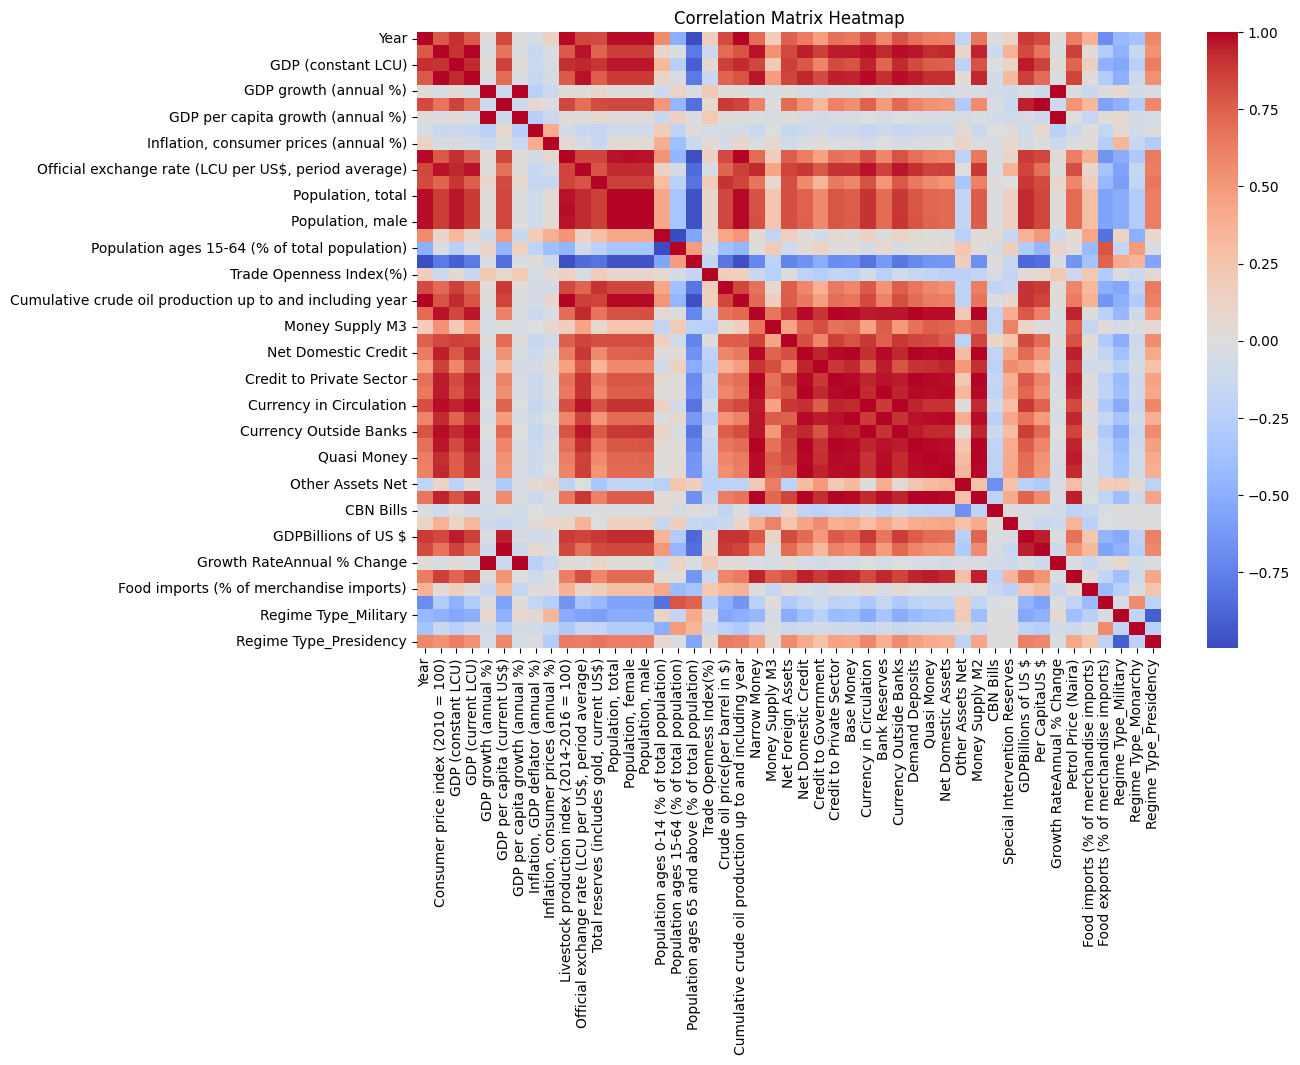

In [ ]:
# Visualizing Correlation on heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Check for multicollinearity
def corrr(df, thresh):
    c_c = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thresh:
                col_name = corr_matrix.columns[i]
                c_c.add(col_name)
    return c_c

high_corr_features = corrr(data, 0.85)
print(f"Features with high correlation: {high_corr_features}")

Features with high correlation: {'GDP per capita (current US$)', 'Total reserves (includes gold, current US$)', 'Population, total', 'Population ages 15-64 (% of total population)', 'Cumulative crude oil production up to and including year', 'Currency Outside Banks', 'Credit to Private Sector', 'Population, male', 'Net Domestic Credit', 'Per CapitaUS $', 'GDPBillions of US $', 'Net Domestic Assets', 'Petrol Price (Naira)', 'Credit to Government', 'Population, female', 'GDP (constant LCU)', 'GDP per capita growth (annual %)', 'Quasi Money', 'Demand Deposits', 'GDP (current LCU)', 'Currency in Circulation', 'Money Supply M2', 'Bank Reserves', 'Crude oil price(per barrel in $)', 'Narrow Money', 'Growth RateAnnual % Change', 'Official exchange rate (LCU per US$, period average)', 'Base Money', 'Regime Type_Presidency', 'Net Foreign Assets', 'Livestock production index (2014-2016 = 100)', 'Population ages 65 and above (% of total population)'}


In [ ]:
# Define target variable and features
target = 'GDP per capita (current US$)'  # Replace with your target variable
X = data.drop(columns=[target])
y = data[target]

In [ ]:
X

,Year,Consumer price index (2010 = 100),GDP (constant LCU),GDP (current LCU),GDP growth (annual %),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)",Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",...,Special Intervention Reserves,GDPBillions of US $,Per CapitaUS $,Growth RateAnnual % Change,Petrol Price (Naira),Food imports (% of merchandise imports),Food exports (% of merchandise imports),Regime Type_Military,Regime Type_Monarchy,Regime Type_Presidency
0,1960,0.07,9.280000e+12,2.997269e+09,0.19,-1.83,6.26,5.44,17.19,0.71,...,258214.99,4.20,93.40,0.00,0.05,14.13,64.52,False,True,False
1,1961,0.07,9.300000e+12,3.190921e+09,0.19,-1.83,6.26,6.28,17.19,0.71,...,258214.99,4.47,97.42,0.19,0.05,14.13,64.52,False,True,False
2,1962,0.07,9.680000e+12,3.506715e+09,4.10,1.95,5.57,5.27,15.71,0.71,...,258214.99,4.91,104.85,4.10,0.05,14.13,64.52,False,True,False
3,1963,0.07,1.050000e+13,3.689709e+09,8.58,6.31,-3.09,-2.69,15.95,0.71,...,258214.99,5.17,108.02,8.58,0.05,12.14,62.31,False,False,True
4,1964,0.07,1.100000e+13,3.966381e+09,4.95,2.73,2.43,0.86,17.60,0.71,...,258214.99,5.55,113.66,4.95,0.05,9.24,61.00,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,302.94,7.080000e+13,1.542520e+14,-1.79,-4.16,7.85,13.25,111.48,358.81,...,317234.17,432.20,2074.61,-1.79,165.00,14.63,2.98,False,False,True
61,2021,354.30,7.340000e+13,1.760760e+14,3.65,1.18,10.13,16.95,111.54,401.15,...,340377.25,440.84,2065.77,3.65,168.00,14.16,3.28,False,False,True
62,2022,421.07,7.580000e+13,2.023650e+14,3.25,0.82,11.31,18.85,112.91,425.98,...,375808.20,472.62,2162.63,3.25,195.00,11.43,2.75,False,False,True
63,2023,421.07,7.580000e+13,2.023650e+14,3.25,0.82,11.31,18.85,112.91,425.98,...,340630.66,472.62,2162.63,3.25,626.00,14.72,12.64,False,False,True


In [ ]:
y

0       93.40
1       97.42
2      104.85
3      108.02
4      113.66
       ...   
60    2074.61
61    2065.77
62    2162.63
63    2162.63
64    2162.63
Name: GDP per capita (current US$), Length: 65, dtype: float64

In [ ]:
# Keep feature names for plotting importance
feature_names = X.columns

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define evaluation metrics
def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, mae, r2

# Define and evaluate different models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f"{name} - MSE: {mse}, MAE: {mae}, R2: {r2*100}%")
    model_list.append(name)
    r2_list.append(r2)

    # Save the trained model
    joblib.dump(model, f"{name}.pkl")

    print('='*35)
    print('\n')

Decision Tree Regressor - MSE: 12175.124330769217, MAE: 73.8361538461538, R2: 98.60567649946606%


K-Nearest Neighbors Regressor - MSE: 27907.988086153873, MAE: 131.38369230769234, R2: 96.80391242142763%


XGBoost Regressor - MSE: 16339.238057479644, MAE: 70.54398263784559, R2: 98.1287925293061%


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 42
[LightGBM] [Info] Start training from score 1156.562689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

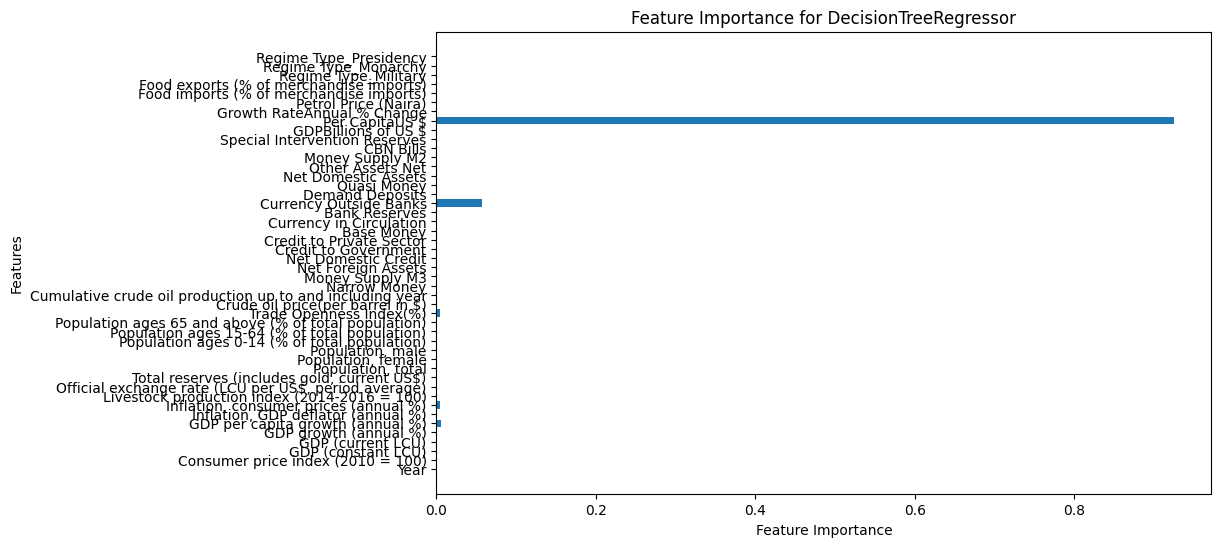

Important Features:
1. Year
2. Consumer price index (2010 = 100)
3. GDP (constant LCU)
4. GDP (current LCU)
5. GDP growth (annual %)
6. GDP per capita growth (annual %)
7. Inflation, GDP deflator (annual %)
8. Inflation, consumer prices (annual %)
9. Livestock production index (2014-2016 = 100)
10. Official exchange rate (LCU per US$, period average)
11. Total reserves (includes gold, current US$)
12. Population, total
13. Population, female
14. Population, male
15. Population ages 0-14 (% of total population)
16. Population ages 15-64 (% of total population)
17. Population ages 65 and above (% of total population)
18. Trade Openness Index(%)
19. Crude oil price(per barrel in $)
20. Cumulative crude oil production up to and including year
21. Narrow Money
22. Money Supply M3
23. Net Foreign Assets
24. Net Domestic Credit
25. Credit to Government
26. Credit to Private Sector
27. Base Money
28. Currency in Circulation
29. Bank Reserves
30. Currency Outside Banks
31. Demand Deposits
32. Q

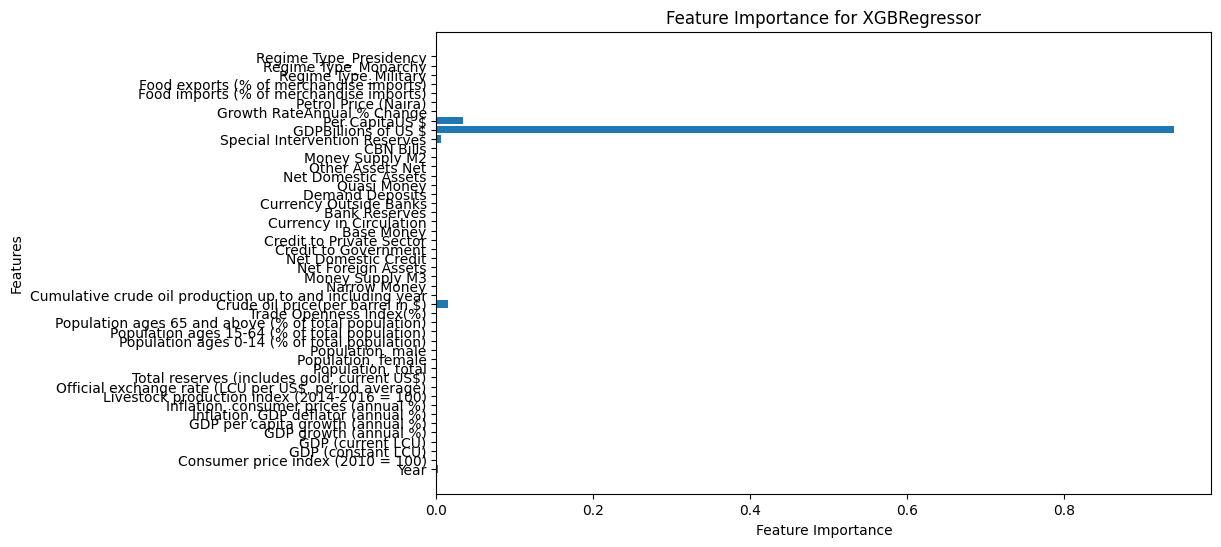

Important Features:
1. Year
2. Consumer price index (2010 = 100)
3. GDP (constant LCU)
4. GDP (current LCU)
5. GDP growth (annual %)
6. GDP per capita growth (annual %)
7. Inflation, GDP deflator (annual %)
8. Inflation, consumer prices (annual %)
9. Livestock production index (2014-2016 = 100)
10. Official exchange rate (LCU per US$, period average)
11. Total reserves (includes gold, current US$)
12. Population, total
13. Population, female
14. Population, male
15. Population ages 0-14 (% of total population)
16. Population ages 15-64 (% of total population)
17. Population ages 65 and above (% of total population)
18. Trade Openness Index(%)
19. Crude oil price(per barrel in $)
20. Cumulative crude oil production up to and including year
21. Narrow Money
22. Money Supply M3
23. Net Foreign Assets
24. Net Domestic Credit
25. Credit to Government
26. Credit to Private Sector
27. Base Money
28. Currency in Circulation
29. Bank Reserves
30. Currency Outside Banks
31. Demand Deposits
32. Q

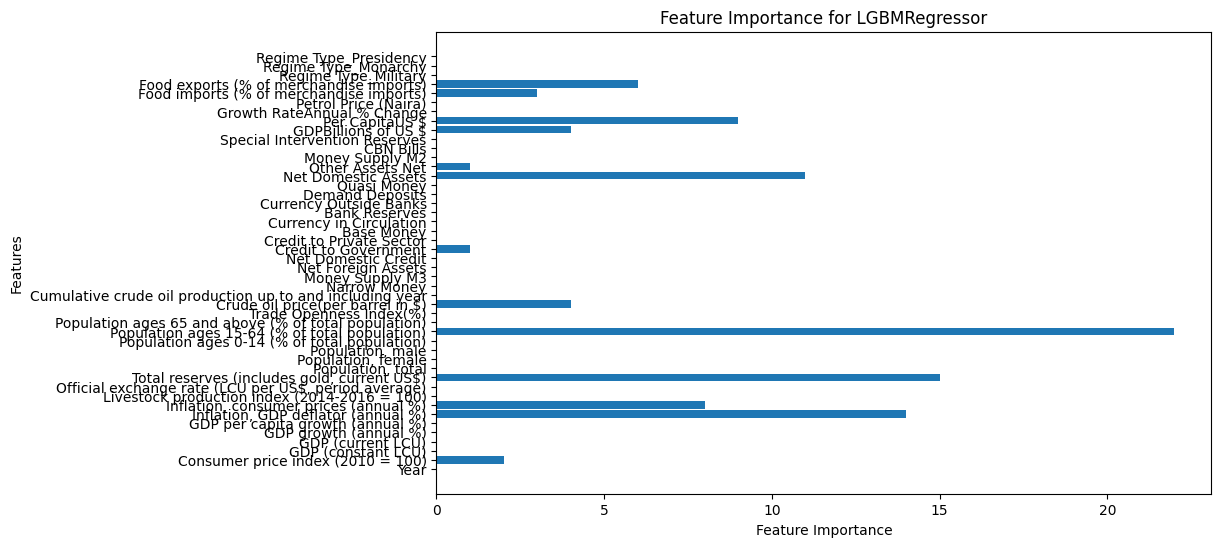

Important Features:
1. Year
2. Consumer price index (2010 = 100)
3. GDP (constant LCU)
4. GDP (current LCU)
5. GDP growth (annual %)
6. GDP per capita growth (annual %)
7. Inflation, GDP deflator (annual %)
8. Inflation, consumer prices (annual %)
9. Livestock production index (2014-2016 = 100)
10. Official exchange rate (LCU per US$, period average)
11. Total reserves (includes gold, current US$)
12. Population, total
13. Population, female
14. Population, male
15. Population ages 0-14 (% of total population)
16. Population ages 15-64 (% of total population)
17. Population ages 65 and above (% of total population)
18. Trade Openness Index(%)
19. Crude oil price(per barrel in $)
20. Cumulative crude oil production up to and including year
21. Narrow Money
22. Money Supply M3
23. Net Foreign Assets
24. Net Domestic Credit
25. Credit to Government
26. Credit to Private Sector
27. Base Money
28. Currency in Circulation
29. Bank Reserves
30. Currency Outside Banks
31. Demand Deposits
32. Q

array([3200.95, 2187.89,   97.42,  992.75,  113.66, 2162.63,  441.98,
        254.39, 2162.63,  609.37,  519.64,  124.79,  563.05])

In [ ]:
# Feature importance (for tree-based models)
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, importance)
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title(f'Feature Importance for {model.__class__.__name__}')
        plt.show()
        print("Important Features:")
        for idx, feature in enumerate(feature_names):
            print(f"{idx + 1}. {feature}")

for name, model in models.items():
    if isinstance(model, DecisionTreeRegressor) or isinstance(model, XGBRegressor) or isinstance(model, LGBMRegressor):
        plot_feature_importance(model, feature_names)

# Load the best performing model
best_model_name = model_list[np.argmax(r2_list)]
print(f"Best Model: {best_model_name}")
best_model = joblib.load(f"{best_model_name}.pkl")

# Predict using the loaded model
best_model.predict(X_test)
